In [4]:
import pandas as pd

In [10]:
(1) #讀昆盈KYE股價資料
KYE=pd.read_csv('2365.csv',index_col='Date')
#KYE=pd.read_csv('2365.csv',sep='\t',index_col='Date')
KYE.index=pd.to_datetime(KYE.index)
KYE.head(n=3)

,Close
Date,
2014-01-02,9.4555
2014-01-03,9.5326
2014-01-06,9.5326


In [11]:
#讀仲琦Hitron股價資料
Hitron=pd.read_csv('2419.csv',index_col='Date')
#KYE=pd.read_csv('2365.csv',sep='\t',index_col='Date')
Hitron.index=pd.to_datetime(Hitron.index)
Hitron.head(n=3)

,Close
Date,
2014-01-02,12.2909
2014-01-03,12.1363
2014-01-06,11.9817


In [12]:
#定義配對形成期(formation period)
formStart='2014-01-01'
formEnd='2014-09-30'
KYef=KYE[formStart:formEnd]
Hitronf=Hitron[formStart:formEnd]
KYef.head(3)
Hitronf.head(3)

,Close
Date,
2014-01-02,12.2909
2014-01-03,12.1363
2014-01-06,11.9817


In [13]:
#將兩支股票收盤價整合再一起形成Dataframe
pairf=pd.concat([KYef.Close,Hitronf.Close],axis=1)
#len(pairf)
pairf

#改columns的名字,不然都叫Close
pairf.columns=['KYeP', 'HitronP']
pairf

,KYeP,HitronP
Date,,
2014-01-02,9.4555,12.2909
2014-01-03,9.5326,12.1363
2014-01-06,9.5326,11.9817
2014-01-07,9.5712,12.2136
2014-01-08,9.6098,12.2909
...,...,...
2014-09-24,9.7420,13.3648
2014-09-25,9.5783,13.0484
2014-09-26,9.4555,12.7717


In [14]:
import matplotlib.pyplot as plt

<Axes: title={'center': '2014 Close Price'}, xlabel='Date'>

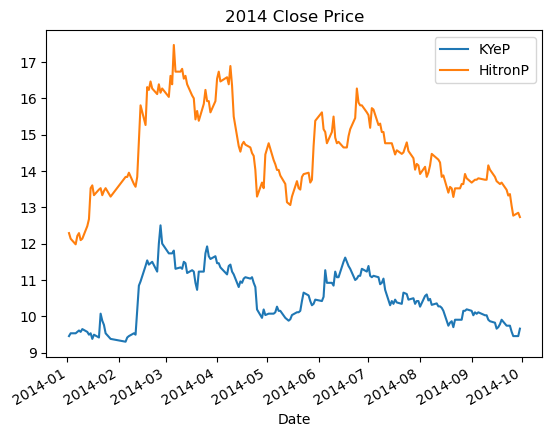

In [15]:
pairf.plot(title='2014 Close Price')

In [ ]:
#(2)構造標準化價格之差平方累積SSD函數，並計算標準化價格距離
#def SSD(priceX, priceY):
#    if priceX is None or priceY is None:
#     print('缺少價格序列.')
#    standardX=priceX/priceX[0]
#    standardY=priceY/priceY[0]
#    SSD=np.sum((standardX-standardY)**2)
#    return(SSD)

In [ ]:
#還未跑
#KYEf=pairf['KYE']
#Hitronf=pairf['Hitron']

#dis=SSD(KYEf,Hitronf)
#dis

In [16]:
#檢查序列穩定(匯入ADF函數與numpy套件)
#from arch.unitroot import ADF
from statsmodels.tsa.stattools import adfuller

In [17]:
import numpy as np

In [18]:
#檢定昆盈對數價格I(1)一階整合性
#先取股價對數
KYeflog=np.log(KYef)
Hitronflog=np.log(Hitronf)
#改欄位名字
KYeflog.columns=['KYeflog']
Hitronflog.columns=['Hitronflog']

KYeflog=KYeflog.dropna()
Hitronflog=Hitronflog.dropna()

Hitronflog

,Hitronflog
Date,
2014-01-02,2.508859
2014-01-03,2.496201
2014-01-06,2.483380
2014-01-07,2.502550
2014-01-08,2.508859
...,...
2014-09-24,2.592624
2014-09-25,2.568666
2014-09-26,2.547232


In [20]:
#check兩個時間序列是否都是非定態I(1)(即一階差分後定態）,這樣才能跑coint
#先看昆盈level是否為非定態
#不拒絕表示不穩定
from statsmodels.tsa.stattools import adfuller
adfA=adfuller(KYeflog)
print('ADF Statistics: %f' % adfA[0])
print('p-value: %f' % adfA[1])
print('Critical Values:')
for key, value in adfA[4].items():
 print('\t%s: %.3f' % (key,value))

ADF Statistics: -2.061447
p-value: 0.260297
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [23]:
 #看昆盈一階差分後是否為定態,即I(1)
#結果顯著表示穩定
retA=KYeflog.diff()[1:]
retA.rename(columns={'KYeflog':'retA'}) #改一下欄位名比較好理解
adfA=adfuller(retA)
print('ADF Statistics: %f' % adfA[0])
print('p-value: %f' % adfA[1])
print('Critical Values:')
for key, value in adfA[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistics: -12.804627
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [24]:
# 再看仲琦level是否為非定態
from statsmodels.tsa.stattools import adfuller
adfB=adfuller(Hitronflog)
print('ADF Statistics: %f' % adfB[0])
print('p-value: %f' % adfB[1])
print('Critical Values:')
for key, value in adfB[4].items():
 print('\t%s: %.3f' % (key,value))

ADF Statistics: -2.565087
p-value: 0.100430
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [26]:
 #再看仲琦一階差分後是否為定態即I(1)
retＢ=Hitronflog.diff()[1:]
retB.rename(columns={'Hitronflog':'retB'})   #改一下欄位名比較好理解
adfＢ=adfuller(retＢ)
print('ADF Statistics: %f' % adfＢ[0])
print('p-value: %f' % adfＢ[1])
print('Critical Values:')
for key, value in adfＢ[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistics: -5.436443
p-value: 0.000003
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [28]:
import statsmodels.api as sm
#statsmodels.regression.linear_model.OLS
#共整合檢定cointegration
#Y是昆盈A股票對數價格
#X是仲琦對數價格
#add_constant表示加入截距項
#先設超參數在fit
#係數皆有顯著
model=sm.OLS(KYeflog,sm.add_constant(Hitronflog))
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                KYeflog   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     648.2
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.47e-61
Time:                        11:12:17   Log-Likelihood:                 370.38
No. Observations:                 182   AIC:                            -736.8
Df Residuals:                     180   BIC:                            -730.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3869      0.077      5.009      0.0

In [32]:
#擷取回歸截距項與slope
alpha=result.params[0]
beta=result.params[1]
alpha
beta

C:\Users\User\AppData\Local\Temp\ipykernel_14900\83549826.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=result.params[0]
C:\Users\User\AppData\Local\Temp\ipykernel_14900\83549826.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta=result.params[1]


0.7353437818017321

In [34]:
#求殘差(ECM, error correction mechanism)
#利用真實的y檢調預測的y得到殘差
spreadf=KYeflog.KYeflog-beta*Hitronflog.Hitronflog-alpha
spreadf.head(100)

Date
2014-01-02    0.014773
2014-01-03    0.032202
2014-01-06    0.041629
2014-01-07    0.031574
2014-01-08    0.030960
                ...   
2014-05-28    0.017748
2014-05-29   -0.026486
2014-05-30   -0.049384
2014-06-03   -0.064084
2014-06-04   -0.030860
Length: 100, dtype: float64

<Axes: xlabel='Date'>

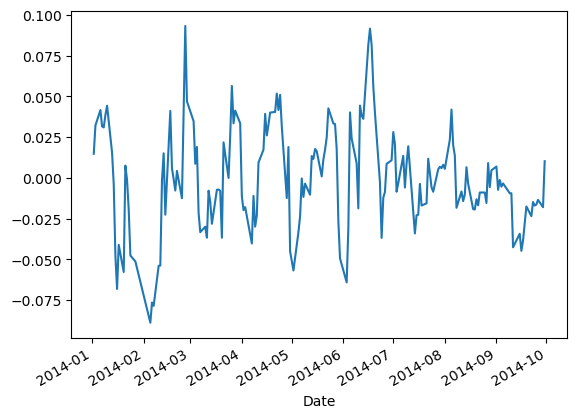

In [35]:
#畫殘差序列圖
spreadf.plot()

In [37]:
#價差單根檢定, 若價差穩定stationary表示兩序列的確有共整合關係(長期均衡關係)
#拒絕H0，表示為定態
from statsmodels.tsa.stattools import adfuller
adfspread=adfuller(spreadf)
print('ADF Statistics: %f' % adfspread[0])
print('p-value: %f' % adfspread[1])
print('Critical Values:')
for key, value in adfspread[4].items():
 print('\t%s: %.3f' % (key,value))

ADF Statistics: -5.116535
p-value: 0.000013
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [38]:
#當交易期價差超過u+1.2sigma-->開倉
#當交易期價差又回到u附近時,進行平倉
#當sigma倍數設定較小,會頻觸發交易訊號,但賺取的收益較小
#若倍數設定較大,會有較高收益,但較少觸發交易訊號
mu=np.mean(spreadf)
sd=np.std(spreadf)
print(mu)
print(sd)
print(mu+1.2*sd)
print(mu-1.2*sd)

8.064367244804708e-16
0.031619184391863134
0.03794302127023656
-0.03794302127023495


In [44]:
#交易期
#用前九個月形成交易策略，後三個月為交易期
tradStart='2014-10-01'
tradEnd='2014-12-31'
KYEt=KYE[tradStart:tradEnd].Close
Hitront=Hitron[tradStart:tradEnd].Close
KYEt

Date
2014-10-01     9.8238
2014-10-02     9.8238
2014-10-03     9.7420
2014-10-06     9.7420
2014-10-07     9.5783
               ...   
2014-12-26     9.9466
2014-12-27     9.9466
2014-12-29    10.1513
2014-12-30     9.9466
2014-12-31     9.9466
Name: Close, Length: 66, dtype: float64

In [42]:
CoSpreadT=np.log(KYEt)-beta*np.log(Hitront)-alpha
CoSpreadT.describe()

count    66.000000
mean     -0.022154
std       0.033877
min      -0.090217
25%      -0.049913
50%      -0.021257
75%       0.001238
max       0.069636
Name: Close, dtype: float64

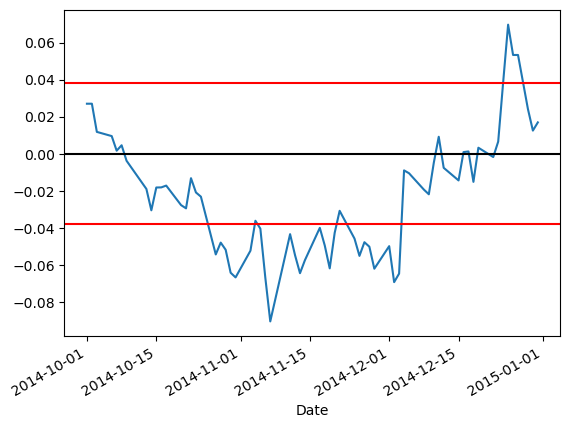

In [45]:
#交易期價差序列(共整合配對後)
#藍色線觸碰到紅線，觸發交易訊號
CoSpreadT.plot()
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+1.2*sd,color='red')
plt.axhline(y=mu-1.2*sd,color='red')

In [46]:
print('Correlation: ' + str(KYeflog.KYeflog.corr(Hitronflog.Hitronflog)))

#較正式的ECM的ECM (cointegration test),短期修正效果,p-value小就有共整合

from statsmodels.tsa.stattools import coint
#result_coint=coint()
score, pvalue, _ = coint(KYeflog,Hitronflog, maxlag=1)
print('Cointegration test score: ' + str(score))
print('Cointegration test p-value: ' + str(pvalue))
#print('coint t-Statistics: %f' % result_coint[0])
#print('p-value: %f' % result_coint[1])
#print('Critical Values:')
#for key, value in result_coint[4]:
# print('\t%s: %.3f' % (key,value))

Correlation: 0.8846823776456153
Cointegration test score: -5.130761627197595
Cointegration test p-value: 9.397663677371489e-05


In [ ]:
#開始VAR模型
from statsmodels.tsa.api import VAR

In [ ]:
#model=VAR(pairf)

In [ ]:
#選取最佳order
#model.select_order(maxlags=12).summary()

In [ ]:
#找出最佳order(p=1)的自回歸模型
#model_fitted=model.fit(1)
#model_fitted.summary()

In [ ]:
#將兩支股票報酬率整合再一起形成Dataframe
pair_ret=pd.concat([retA,retB],axis=1)
#len(pair_ret)
pair_ret

In [ ]:
model_ret=VAR(pair_ret)
model_ret.select_order(maxlags=12).summary()

In [ ]:
#找出最佳order(p=0)的自回歸模型
model_fitted=model_ret.fit(0)
model_fitted.summary()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests


In [ ]:
url="https://raw.githubusercontent.com/Statology/Miscellaneous/main/chicken_egg.txt"
df=pd.read_csv(url,sep=" ")
df.head()

In [ ]:
#perform Granger-Causality test
# Q: eggs --> chicken ?
# whether eggs granger cause the chicken ?

#Note: if F large or p-value is small then we can reject H0 of the test
#and conclude that number of eggs is useful
#in predicting the future # of chickens

grangercausalitytests(df[['chicken','egg']],maxlag=[3])

In [ ]:
#perform 逆向 Granger-Causality test
# Q: chicken --> eggs  ?
# whether chicken granger cause the eggs  ?

#Note: if F large or p-value is small then we can reject H0 of the test
#and conclude that number of chickens is useful
#in predicting the future # of eggs

grangercausalitytests(df[['egg','chicken']],maxlag=[3])



In [ ]:
import pandas_datareader as pdr
# 从FRED数据库下载GDP, 通货膨胀率和联邦基金利率的数据
macrodata = pdr.get_data_fred(['GDP', 'CPIAUCSL', 'FEDFUNDS'], start='2000-01-01', end='2023-01-01')
macrodata.head()

In [ ]:
# 填补空缺值并进行差分处理（解决单位根问题）
macrodata = macrodata.fillna(method='ffill').dropna()  # 处理缺失值
macrodata_diff = macrodata.diff().dropna()  # 差分数据

In [ ]:
from statsmodels.tsa.api import VAR

model2 = VAR(macrodata_diff)
model2.select_order(maxlags=12).summary()


In [ ]:
fitted_model = model.fit(2)
print(fitted_model.summary())

In [ ]:
# Granger 因果检验 的 另種python函式 (比egg跟chicken例子用的函式好)
# GDP 是否 Granger 引起 CPIAUCSL (通货膨胀率)
granger_test_gdp_cpi = fitted_model.test_causality('CPIAUCSL', ['GDP'], kind='f')
print('Granger causality test for GDP causing Inflation:')
print(granger_test_gdp_cpi.summary())

# CPIAUCSL (通货膨胀率) 是否 Granger 引起 FEDFUNDS (利率)
granger_test_cpi_fedfunds = fitted_model.test_causality('FEDFUNDS', ['CPIAUCSL'], kind='f')
print('Granger causality test for Inflation causing Interest Rate:')
print(granger_test_cpi_fedfunds.summary())

In [ ]:
# 计算并绘制冲击响应函数 (IRF, impulse response function)
irf = fitted_model.irf(10)  # 计算10期的IRF
irf.plot(orth=False)
plt.show()

In [31]:
# 建立共整合模型(另種方法)
#因為如果有很多檔股票，不太能一個一個用回歸處理，故可以這樣操作
#測試統計量夠大，也就是大於所有臨界值，表示是可以用的向量
#所以第一個是可以用的，第二個可能就不太適合
from statsmodels.tsa.vector_ar.vecm import coint_johansen

johansen_test = coint_johansen(pairf, det_order=0, k_ar_diff=1)
# 輸出結果
print("特徵值:", johansen_test.eig)
print("共整合向量:", johansen_test.evec)
print("測試統計量:", johansen_test.lr1)
print("臨界值:", johansen_test.cvt)

特徵值: [0.13089398 0.02071928]
共整合向量: [[ 3.09861801 -0.76333275]
 [-1.88326902 -0.41838376]]
測試統計量: [29.02087638  3.76864854]
臨界值: [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
